What is the best economic domain/industry to invest in (return, risk, stability)? Over all countries, over specific countries/world regions

How is best defined?
Return, risk, stability

Examine a major industries (food, financial, health etc) and determine a goodness score consisting of return, stability and risk

Examine these industries in general and divided by regions etc
(If you are in Africa it is best to invest here etc)

Focus on s&p 500
1. analyse different industries in s&p 500

# Data Visualization Final Project | Industries of the S&P 500 

Scientific Question: How does the risk and return profile vary across different sectors in the stock market, and can sector-specific patterns be identified to inform investment decisions?

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
stocks = pd.read_csv('data/company_list/sp500_companies.csv')
industries = stocks['GICS Sector'].unique()
industries_occ = stocks['GICS Sector'].value_counts()

print(stocks.head())
print(industries)

  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  
['Industrials' 'Health Care' 'Information Technology' 'Utilities'
 'Financials' 'Materials' 'Consumer Discretionary' 'Real Estate'
 'Co

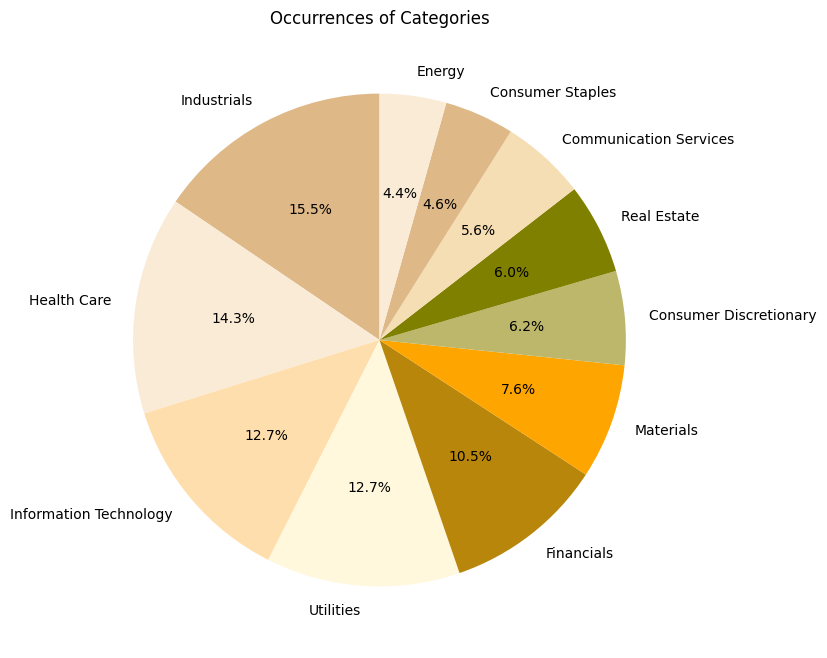

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(industries_occ, labels=industries, autopct='%1.1f%%', startangle=90, colors=['burlywood','antiquewhite','navajowhite','cornsilk','darkgoldenrod','orange','darkkhaki','olive','wheat'])
plt.title('Occurrences of Categories')
plt.show()

In [22]:
def calc_avg_return(closing_prices: pd.Series) -> np.float64:
    daily_return = np.diff(closing_prices)
    return np.mean(daily_return)
    

In [ ]:
#expand sp500_companies.csv to include average return and standard deviation (volatility) of each stock
dir_path = '/data/historical_stock_data/indivdual_stocks_5yr/'
avg_return = []
std_dev = []

for filename in os.listdir(dir_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(dir_path, filename)
        hist_data = pd.read_csv(file_path)
        stock_name = hist_data['Name'][0]
        if stock_name in stocks['Symbol']:
            avg_return.append(calc_avg_return(hist_data['close']))
            std_dev.append(np.std(hist_data['close']))
        else:
            avg_return.append(np.nan)

stocks['avg_return'] = np.array(avg_return)
stocks['std_dev'] = np.array(std_dev)